In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import time

## Univariate Linear Regression

In [2]:
data  = pd.read_csv("C:/Users/samee/Downloads/ex1data1.txt", header = None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
#assigning names to each of the columns
data.columns = ['Population', 'Profit']

Text(0.5, 1.0, 'Profit vs Population')

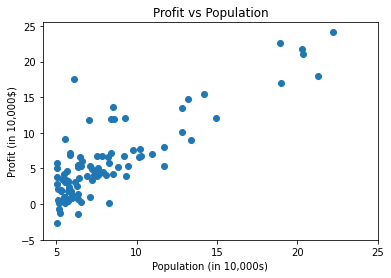

In [5]:
plt.scatter(data['Population'], data['Profit'])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in 10,000$)')
plt.title('Profit vs Population')

## Profit vs Population graph

## Cost Function J(θ)

In [6]:
def computeCost(X,y,theta):
    #Taking a numpy array X,y,theta to get cost function using theta as parameter in a linear regression model
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y)**2
    
    return 1/(m)*np.sum(square_err)

In [7]:
'''we're getting x0 from the eqn h(θ)=x0θ0+x1θ1+... where we can say x0=1'''
data['x0'] = 1

In [8]:
data_val = data.values
m =  len(data_val[:-1])
#out of 97 rows taken all but the last row which is saved for testing
X = data[['x0','Population']].iloc[:-1].values
y = data['Profit'][:-1].values.reshape(m,1)
theta = np.zeros((2,1))

m, X.shape, y.shape, theta.shape

(96, (96, 2), (96, 1), (2, 1))

In [9]:
computeCost(X,y,theta)

64.80968355754062

## Gradient Descent

In [10]:
#alpha:learning rate and num_iters:no of epochs
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take numpy array for X,y,theta and update theta for every iteration of gradient steps
    Return theta and the list of cost of theta during each iteration
    """
    
    m = len(y)
    J_history = []
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions-y))
        descent = alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
        
    return theta, J_history

In [11]:
theta, J_history = gradientDescent(X,y,theta,0.001,2000)

In [12]:
print(f"h(x) = {str(round(theta[0,0],2))} + {str(round(theta[1,0],2))}x1")

h(x) = -1.11 + 0.92x1


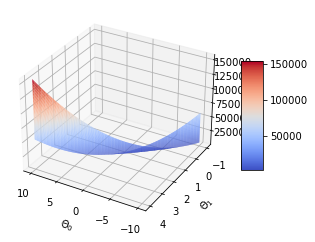

In [13]:
#3D plot of cost fn(convex plot)

from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)

## Making Cost Graph

Text(0.5, 1.0, 'Cost function using Gradient Descent')

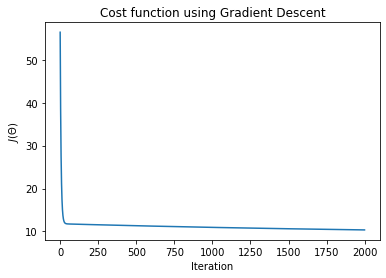

In [14]:
#plotting errors and iters to check if it's going down
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit vs Population')

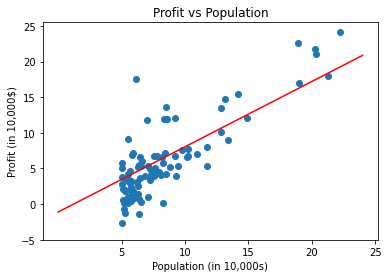

In [15]:
plt.scatter(data['Population'], data['Profit'])
x_value = [x for x in range(25)]
y_value = [x*theta[1] + theta[0] for x in x_value]
plt.plot(x_value, y_value, color = 'r')
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in 10,000$)')
plt.title('Profit vs Population')

## Prediction Function

In [16]:
def predict(X,theta):
    #Takes in numpy array x and theta and returns predicted value of y
    #the last row which we had left to be predicted
    predictions = np.dot(X, theta)
    return predictions

In [17]:
data.tail(1)

,Population,Profit,x0
96,5.4369,0.61705,1


In [18]:
predict1 = predict(data[['x0','Population']].iloc[-1].values, theta)*10000
print(f'For a population of 6170 the predicted profit is ${predict1}')

For a population of 6170 the predicted profit is $[38686.24610338]


## Multivariate Linear Regression

In [19]:
data2  = pd.read_csv("C:\\Users\\samee\\Downloads\\ex1data2.txt", header = None)
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [20]:
#assigning names to each of the columns
data2.columns = ['Size of House', 'No of Bedrooms', 'Price']
data2.head()

,Size of House,No of Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
len(data2)

47

In [22]:
data2.describe()

,Size of House,No of Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## Price vs Size of House graph

Text(0.5, 1.0, 'Price vs Size of House')

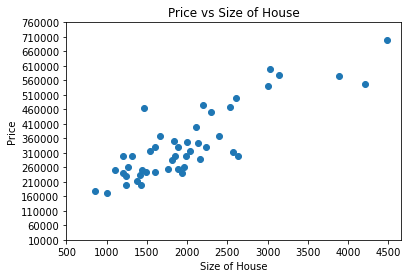

In [23]:
plt.scatter(data2['Size of House'], data2['Price'])
plt.xticks(np.arange(500,5000,step=500))
plt.yticks(np.arange(10000,800000,step=50000))
plt.xlabel('Size of House')
plt.ylabel('Price')
plt.title('Price vs Size of House')

## Price vs No of Bedrooms graph

Text(0.5, 1.0, 'Price vs No of Bedrooms')

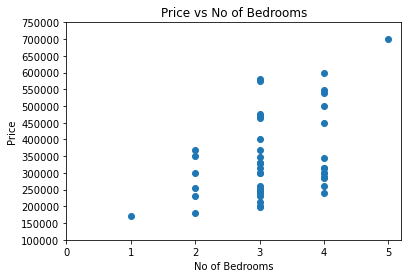

In [24]:
plt.scatter(data2['No of Bedrooms'], data2['Price'])
plt.xticks(np.arange(0,6,step=1))
plt.yticks(np.arange(100000,800000,step=50000))
plt.xlabel('No of Bedrooms')
plt.ylabel('Price')
plt.title('Price vs No of Bedrooms')

We need to normalize the 'Size of House' column as it has quite high values

## Scaling 'Size of House' column

In [39]:
#scales it to values between 0 and 1
col = ['Size of House', 'Price']
scaler = MinMaxScaler()
data2[col] = pd.DataFrame(scaler.fit_transform(data2[col]), columns = data2[col].columns)

## Splitting X and y from Original dataset

In [40]:
y =np.array(data2['Price'][:-1])
X =np.array(data2.drop('Price', axis = 1)[:-1])
X.shape, y.shape

((46, 2), (46,))

In [41]:
#reshaping X and y acc to their correct dimensions
y = y.reshape(y.shape[0], 1)
X = np.c_[np.ones(X.shape[0]), X]
X.shape, y.shape

((46, 3), (46, 1))

## Giving theta values

In [42]:
theta = np.zeros((3, 1))
theta.shape

(3, 1)

In [43]:
alpha = 0.01
noOfIter = 50000
start = time.time()
theta, J_history = gradientDescent(X, y, theta, alpha, noOfIter)
prediction = predict(X, theta)
gd_time = time.time() - start

In [44]:
print(f'h(x) = {str(round(theta[0,0], 2))} + {str(round(theta[1,0], 2))}x1 + {str(round(theta[2,0], 2))}x2')
print(f'Time taken to find out cost = {gd_time}')

h(x) = 0.07 + 0.95x1 + -0.02x2
Time taken to find out cost = 0.5444879531860352


In [45]:
print(f'Accuracy = {round(r2_score(y, prediction) * 100, 3)}%')

Accuracy = 72.914%


In [46]:
data2.tail(1)

,Size of House,No of Bedrooms,Price
46,0.096801,3,0.131321


In [47]:
predict2 = predict(X[-1], theta)*1000000
print(f'The predicted price for a 968 sqft house: {predict2}')

The predicted price for a 968 sqft house: [268335.61509465]


In [48]:
cost_arr = np.asarray(J_history)
cost_arr = cost_arr.reshape((cost_arr.shape[0], 1))
cost_arr.shape

(50000, 1)

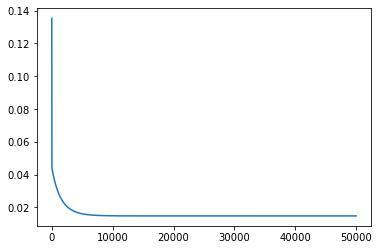

In [49]:
plt.plot(cost_arr)
plt.show()

In [50]:
def LR_GD(dat, predCol, alpha, noOfIter, dec = 5):
    y = np.array(data[predCol].reshape((-1, 1)))
    X = np.array(data.drop(predCol, axis = 1))
    X = np.c_[np.ones(X.shape[0], X)]
    theta = np.zeros((X.shape[1], 1))
    #GD
    m = len(y)
    past_cost = []
    past_theta = []
    for i in range(noOfIter):
        predictions = np.dot(X, theta)
        error = predictions - y
        theta = theta - ((1/m) * alpha * np.dot(X.T, error))
        past_theta.append(theta)
        
        cost = 1/(2*m)*np.dot(error.T, error)
        past_cost.append(cost)
        if (past_theta[i] == past_theta[i + 1]).all(): break
    return past_theta, past_cost, predictions, i + 1

In [52]:
alpha = 0.01
noOfIter = 50000
start = time.time()
theta_LR, J_history_LR, predictions_LR, epoch_stop = LR_GD(data2, 'Price' )

TypeError: LR_GD() missing 2 required positional arguments: 'alpha' and 'noOfIter'

### Interpreting linear regression using statsmodel(kind of r-style)

In [53]:
import statsmodels.formula.api as smf

In [55]:
df=sm.datasets.get_rdataset('Guerry','HistData').data
df=df[['Lottery','Literacy','Wealth','Region']].dropna()
df.head()

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E


In [58]:
mod=smf.ols(formula='Lottery ~ Literacy + Wealth + Region',data=df)
res=mod.fit()
print(res.summary())
#r squared will tell us what % of variance in the dep variable can be exp by ibdep variables coll
#ie Literacy + Wealth + Region define 33% of variance in lottery

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sun, 19 Sep 2021   Prob (F-statistic):           1.07e-05
Time:                        23:30:37   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [59]:
mod=smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region)',data=df)
print(res.params)

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64
